In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer


In [2]:
merged_df = pd.read_csv('ContentBased_merged_dataset.csv')

In [3]:
# Checking for missing values in the dataset
missing_values = merged_df.isnull().sum()

# Inspecting the types of each column to identify categorical variables
column_types = merged_df.dtypes

missing_values, column_types

(artist                0
 author                0
 average_score         0
 review                2
 genre               216
 valence               0
 acousticness          0
 danceability          0
 energy                0
 instrumentalness      0
 key                   0
 liveness              0
 loudness              0
 popularity            0
 speechiness           0
 dtype: int64,
 artist               object
 author               object
 average_score       float64
 review               object
 genre                object
 valence             float64
 acousticness        float64
 danceability        float64
 energy              float64
 instrumentalness    float64
 key                 float64
 liveness            float64
 loudness            float64
 popularity          float64
 speechiness         float64
 dtype: object)

In [4]:
# Handling Missing Values

merged_df['genre'] = merged_df['genre'].fillna('unknown')
# Dropping the 'review' column as it contains text data not used in the regression model
merged_df.drop(columns=['review'], inplace=True)



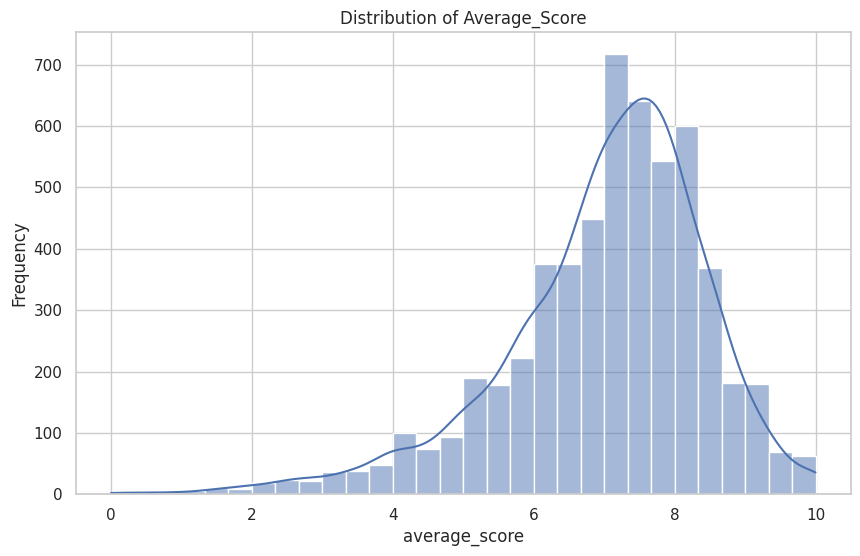

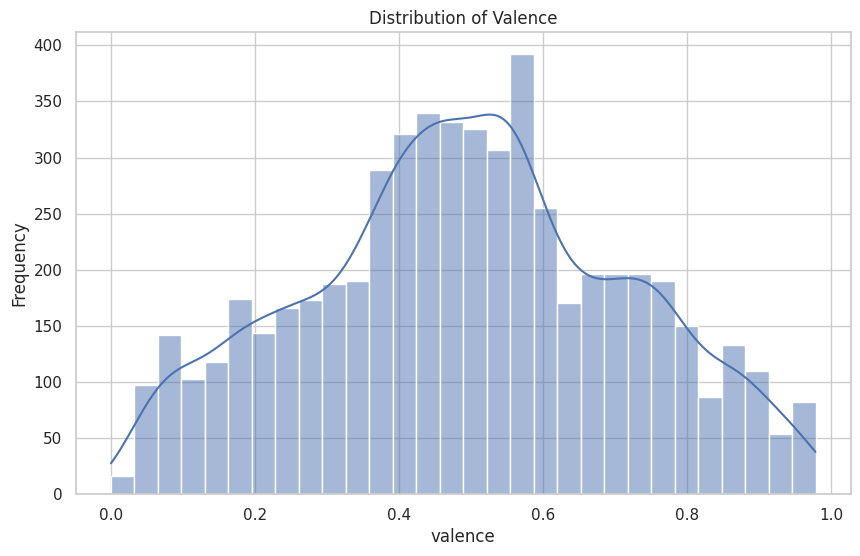

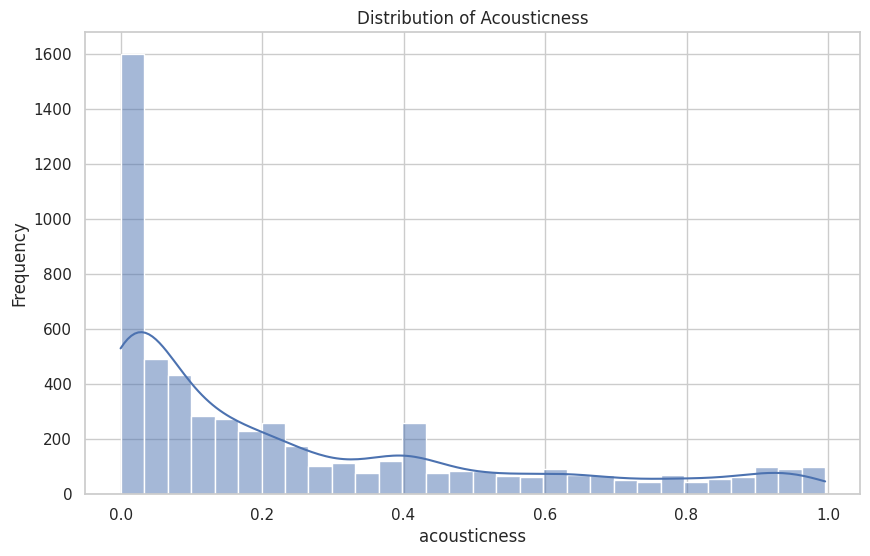

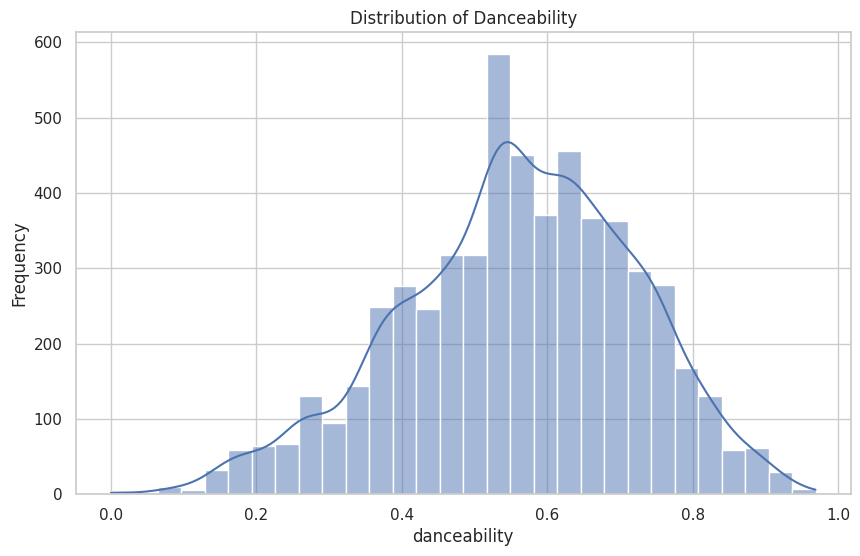

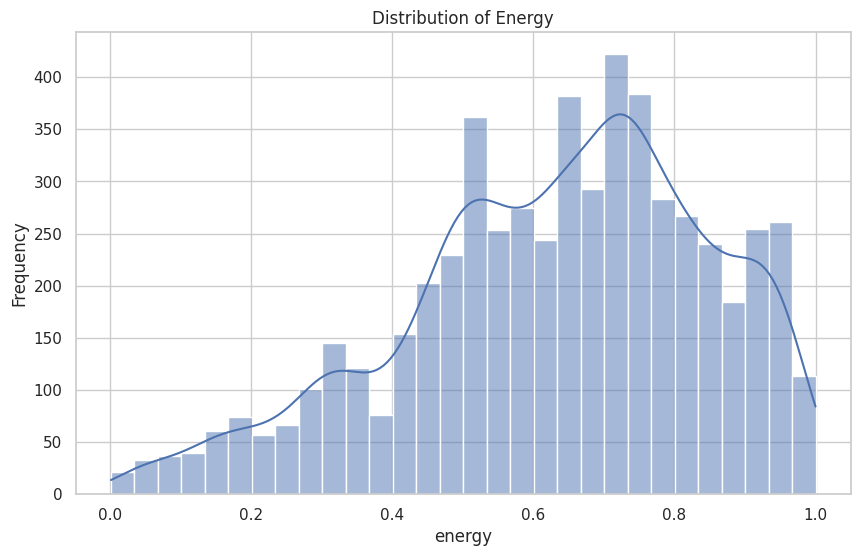

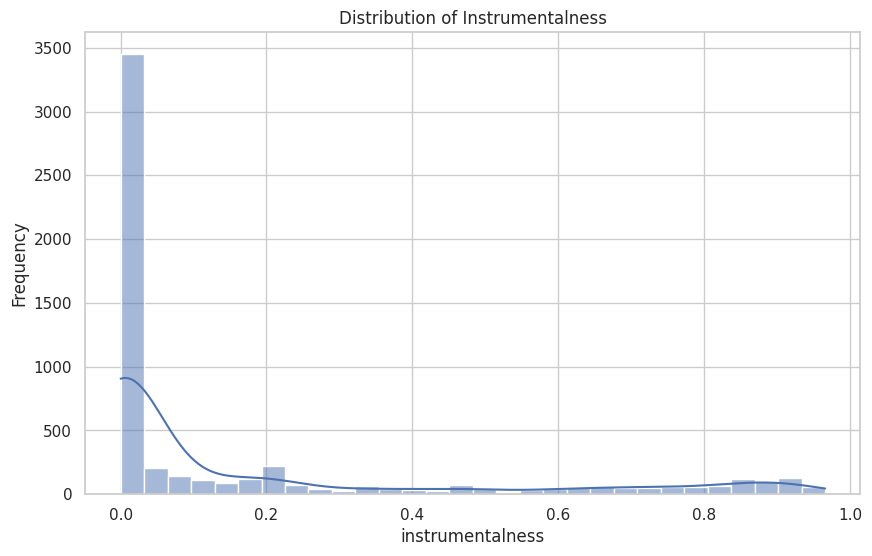

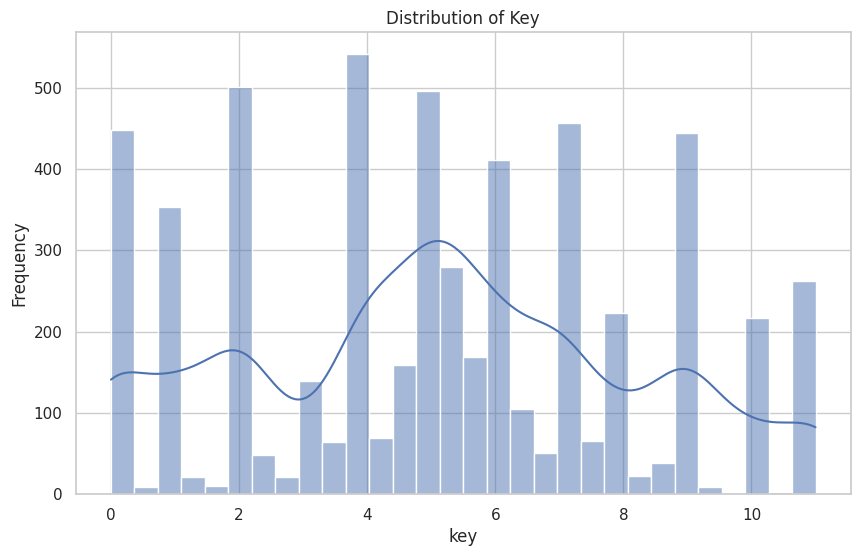

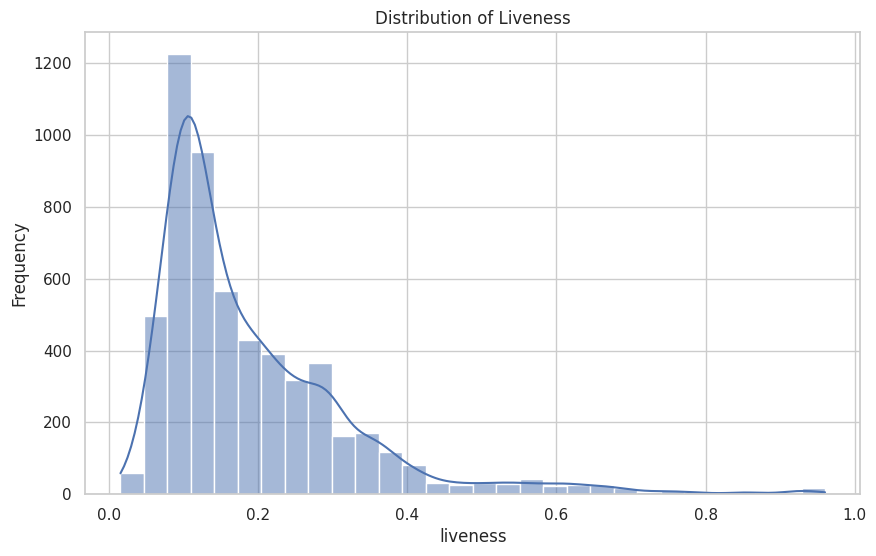

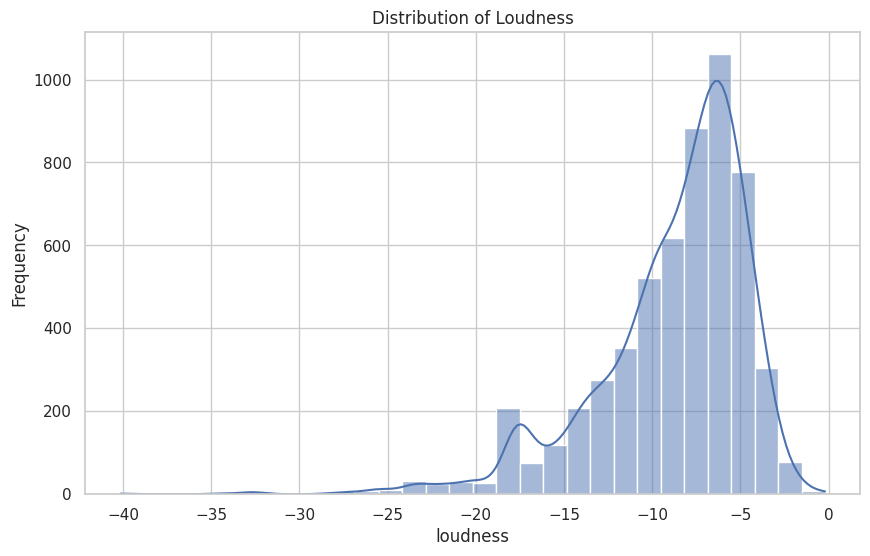

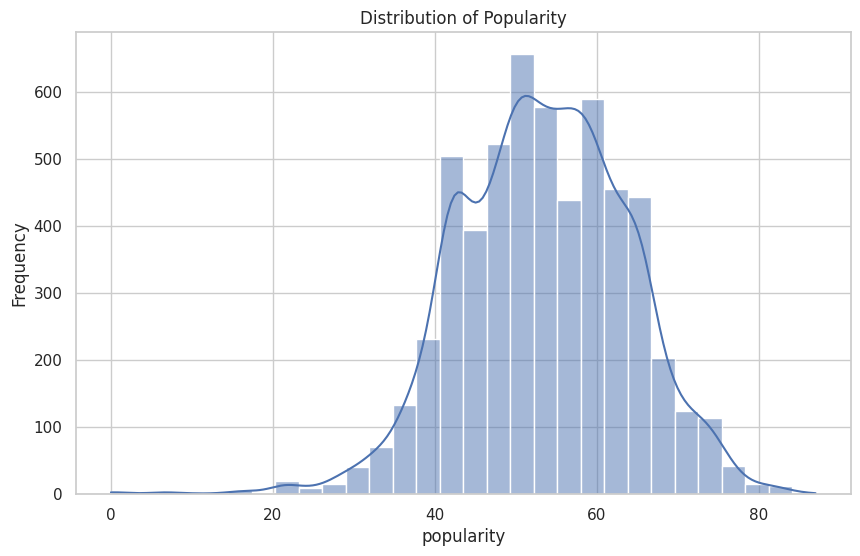

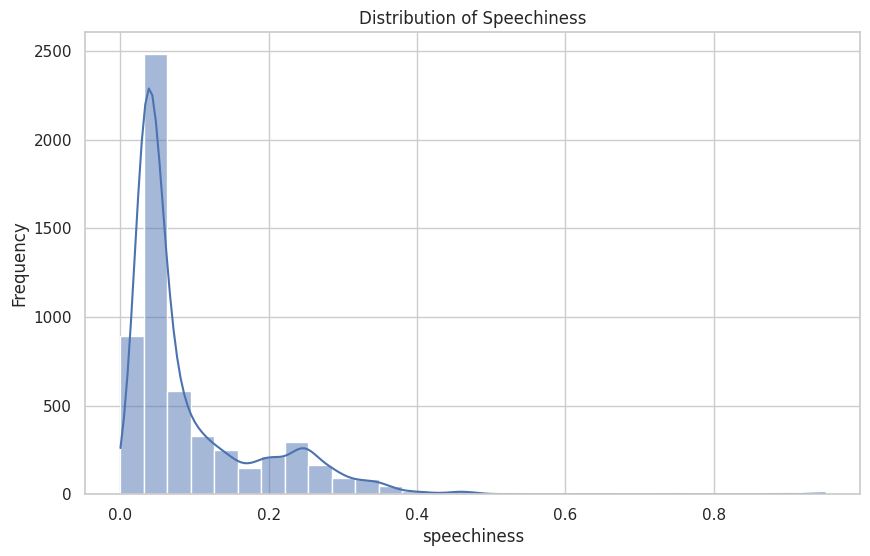

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Function to plot the distribution of a variable
def plot_distribution(merged_df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_df[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plotting distributions for the specified columns
columns_to_plot = ['average_score', 'valence', 'acousticness', 'danceability',
                   'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
                   'popularity', 'speechiness']

for column in columns_to_plot:
    plot_distribution(merged_df, column, f"Distribution of {column.title()}")


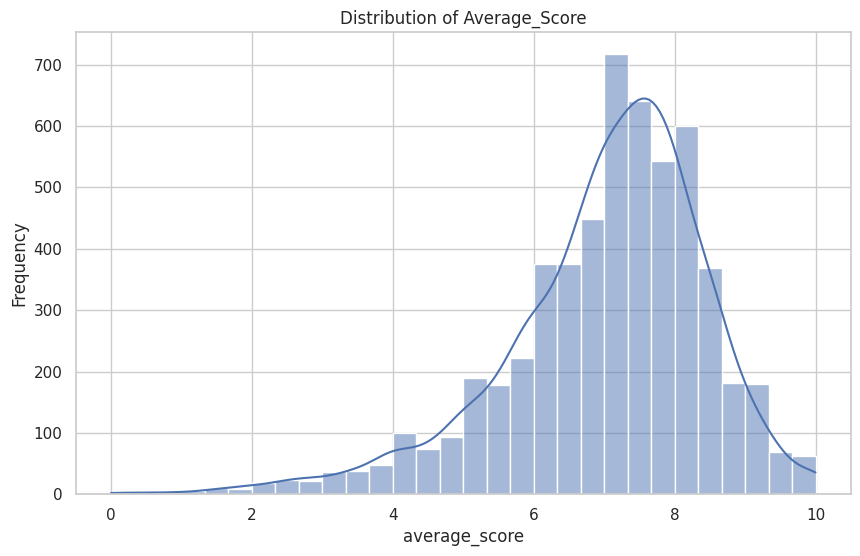

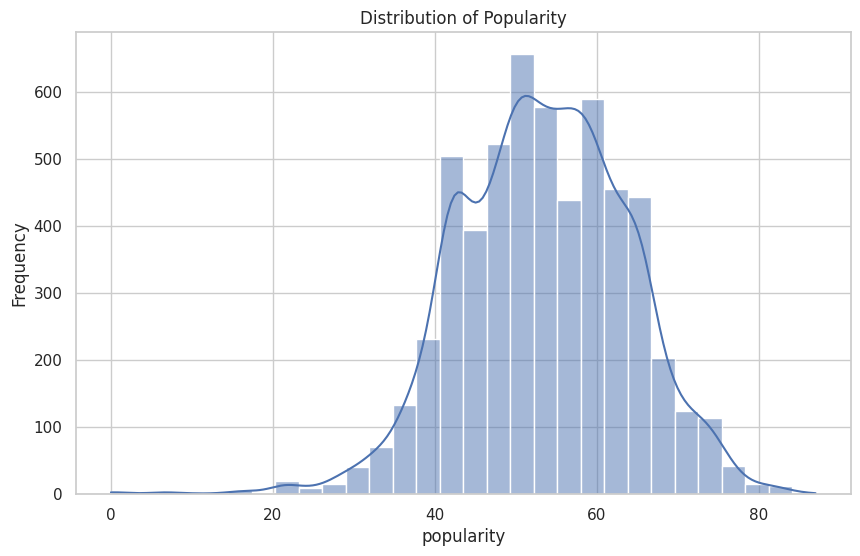

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Function to plot the distribution of a variable
def plot_distribution(merged_df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_df[column], kde=True, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plotting distributions for the specified columns
columns_to_plot = ['average_score','popularity']

for column in columns_to_plot:
    plot_distribution(merged_df, column, f"Distribution of {column.title()}")

<ipython-input-7-86df929773fe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  score_correlation = merged_df.corr()['average_score'].sort_values(ascending=False)


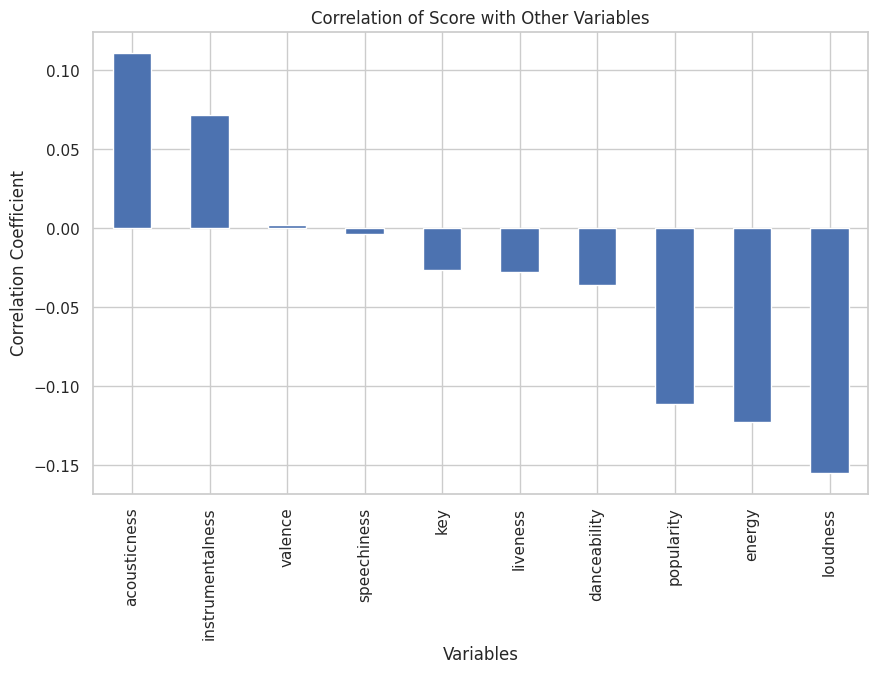

average_score       1.000000
acousticness        0.111138
instrumentalness    0.071380
valence             0.002061
speechiness        -0.003394
key                -0.026379
liveness           -0.027784
danceability       -0.035920
popularity         -0.111542
energy             -0.122706
loudness           -0.154798
Name: average_score, dtype: float64

In [7]:
# Investigating avaerage_score Trends
# Correlating avaerage_score with other variables
score_correlation = merged_df.corr()['average_score'].sort_values(ascending=False)

# Plotting the correlation of avaerage_score with other variables
plt.figure(figsize=(10, 6))
score_correlation.drop('average_score').plot(kind='bar')
plt.title('Correlation of Score with Other Variables')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.show()

score_correlation


<ipython-input-8-f2bb50b1ac1f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  score_correlation = merged_df.corr()['popularity'].sort_values(ascending=False)


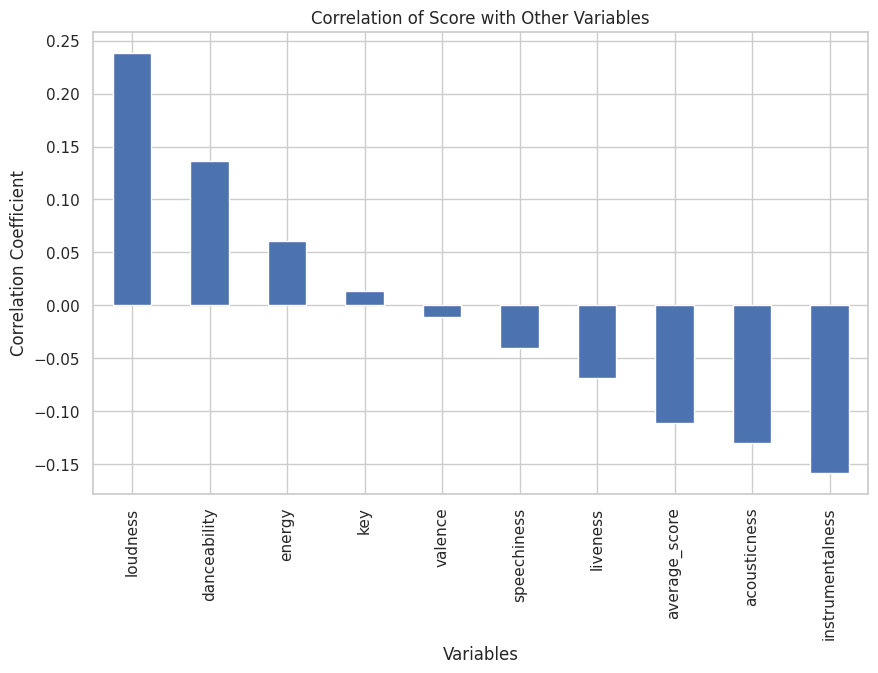

popularity          1.000000
loudness            0.238772
danceability        0.136181
energy              0.061046
key                 0.013430
valence            -0.011218
speechiness        -0.040413
liveness           -0.068830
average_score      -0.111542
acousticness       -0.130144
instrumentalness   -0.158156
Name: popularity, dtype: float64

In [8]:
# Investigating avaerage_score Trends
# Correlating avaerage_score with other variables
score_correlation = merged_df.corr()['popularity'].sort_values(ascending=False)

# Plotting the correlation of avaerage_score with other variables
plt.figure(figsize=(10, 6))
score_correlation.drop('popularity').plot(kind='bar')
plt.title('Correlation of Score with Other Variables')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.show()

score_correlation


- Loudness and Dancebility seem to have the highest impact on how popular a song is going to be
- The correlation seems to be low, but since music is subjective and each user has their own individual preferences, the popularity cannot be generalised to the whole population

In [9]:
# Calculating the average score per artist and genre, ranked from highest to lowest
average_score = merged_df.groupby(['artist', 'genre'])['average_score'].mean().reset_index()
average_score = average_score.sort_values(by='average_score', ascending=False)

average_score.head(10)

,artist,genre,average_score
1564,steviewonder,Pop/R&B,10.00
1998,x-rayspex,Rock,10.00
1809,thestoneroses,Rock,10.00
1611,talktalk,Rock,10.00
667,glenngould,Jazz,10.00
1507,slint,Rock,10.00
1622,television,"Rock,Electronic",10.00
537,elviscostello&theattractions,unknown,9.75
1921,ultramagneticmc's,"Metal,Rap",9.70
1179,n.w.a.,Rap,9.70


In [10]:
# Calculating the average score per artist and genre, ranked from highest to lowest
average_score = merged_df.groupby(['artist', 'genre'])['popularity'].mean().reset_index()
average_score = average_score.sort_values(by='popularity', ascending=False)

average_score.head(10)

,artist,genre,popularity
275,børns,Pop/R&B,87.000000
1233,octavian,Rap,85.000000
602,fosterthepeople,"Electronic,Rock",84.000000
715,harrystyles,Pop/R&B,83.000000
1351,radiohead,Rock,82.000000
1417,rosalía,Pop/R&B,80.333333
924,kingsofleon,Rock,80.000000
861,juicewrld,Rap,79.083333
366,corinnebaileyrae,Pop/R&B,79.000000
329,chrisstapleton,Folk/Country,79.000000


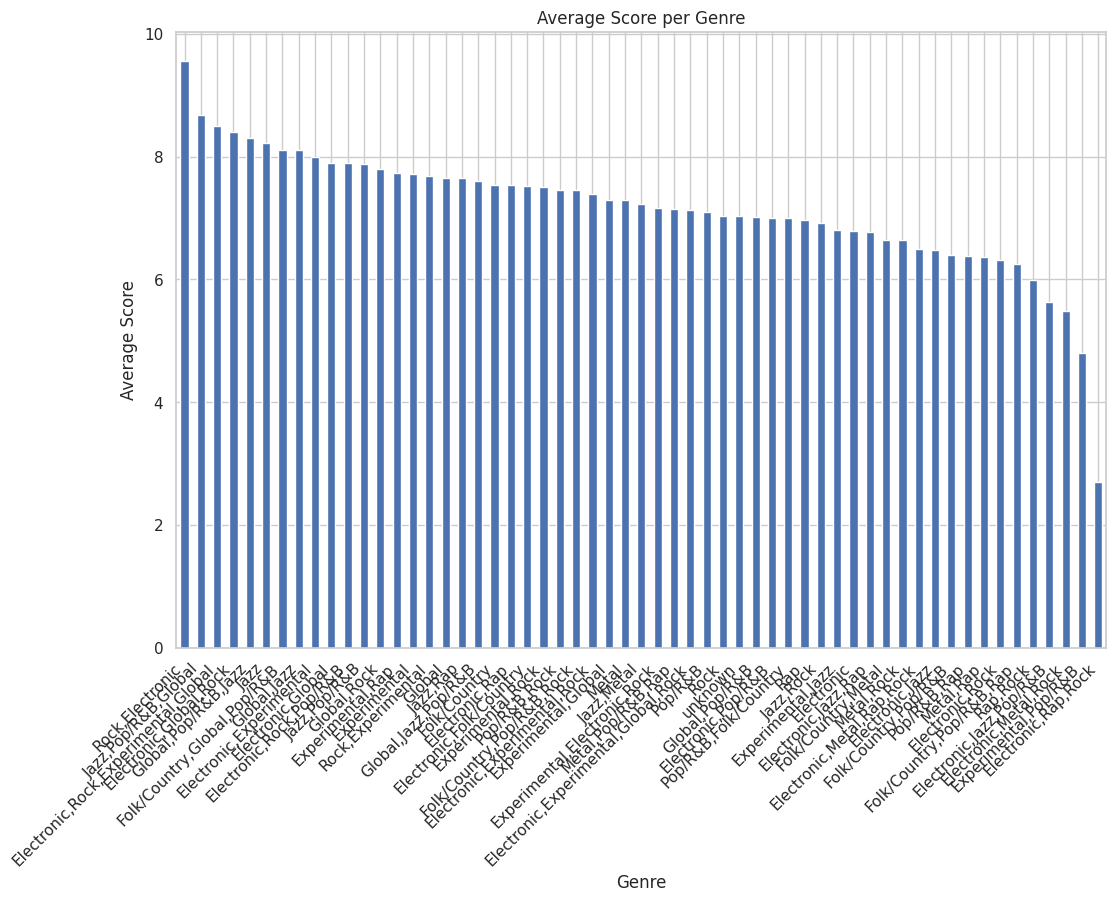

In [11]:
# Calculating the average score per genre and sorting them
average_score_per_genre = merged_df.groupby('genre')['average_score'].mean().sort_values(ascending=False)

# Plotting the genres with the highest scores
plt.figure(figsize=(12, 8))
average_score_per_genre.plot(kind='bar')
plt.title('Average Score per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha="right")
plt.show()


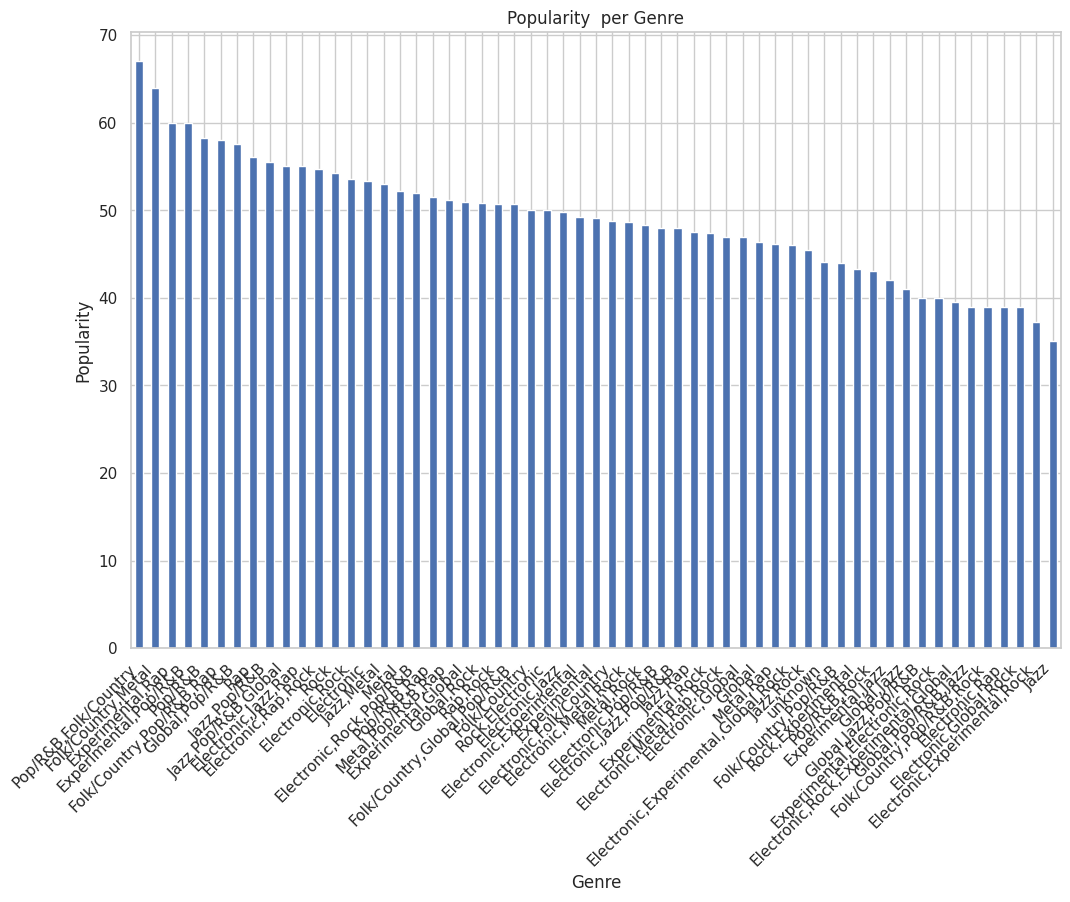

In [12]:
# Calculating the average score per genre and sorting them
Popularity_per_genre = merged_df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

# Plotting the genres with the highest scores
plt.figure(figsize=(12, 8))
Popularity_per_genre.plot(kind='bar')
plt.title('Popularity  per Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha="right")
plt.show()


In [13]:
# Identifying the top 10 users who left the most ratings or reviews
top_10_reviewers = merged_df['author'].value_counts().head(10).index

# Filtering the data for these top 10 reviewers
top_reviewers_data = merged_df[merged_df['author'].isin(top_10_reviewers)]

# Finding the preferred artists and genres for each of these top reviewers
preferred_artists_by_reviewer = top_reviewers_data.groupby('author')['artist'].apply(lambda x: x.value_counts().index[0])
preferred_genres_by_reviewer = top_reviewers_data.groupby('author')['genre'].apply(lambda x: x.value_counts().index[0])

preferred_artists_by_reviewer, preferred_genres_by_reviewer


(author
 Ian Cohen             ...andyouwillknowusbythetrailofdead
 Jayson Greene                                   a$aprocky
 Joe Tangari                               afrikabambaataa
 Marc Hogan                                          alexg
 Mark Richardson                                       air
 Nate Patrin                                     9thwonder
 Ryan Dombal                                        50cent
 Stephen M. Deusner                     13thfloorelevators
 Stuart Berman         ...andyouwillknowusbythetrailofdead
 Tom Breihan                                          2pac
 Name: artist, dtype: object,
 author
 Ian Cohen             Rock
 Jayson Greene          Rap
 Joe Tangari           Rock
 Marc Hogan            Rock
 Mark Richardson       Rock
 Nate Patrin            Rap
 Ryan Dombal           Rock
 Stephen M. Deusner    Rock
 Stuart Berman         Rock
 Tom Breihan            Rap
 Name: genre, dtype: object)